Apprentice Chef Revenue Prediction Model - Creation process

Created by: Luis E. Ariza

01/28/2020

Welcome to this Notebook presenting the steps taken in data preparation and modeling for the Revenue prediction case. Each of the following cells contains the code and generates output for each one of the main steps as follows:

1. Libraries and data imports
2. Univariate feature exploration
3. Bivariate feature exploration
4. Missing values, outlier, and trend change flagging
5. Creation of new features
7. Preparation of train and test datasets
8. Testing of different model options
9. Final model choice

A markdown cell precedes every code cell highlighting its most important characteristics

1. The process starts with importing libraries and loading datasets

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

file = "Apprentice_Chef_Dataset.xlsx"

df = pd.read_excel(file)

2. Univariate feature exploration

The following steps were followed:

    Variable types were confirmed
    Summary statistics were calculated
    Missing values were counted
    Histograms and boxplots were created for all variables
    Outliers were identified through visual inspection

To keep this document light, the next cell will only outputs variable types
and the plots for 4 of the variables found to contain outliers. 
Note that the same procedure was followed for every single variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

Text(0.5, 0, 'Contacts with customer service')

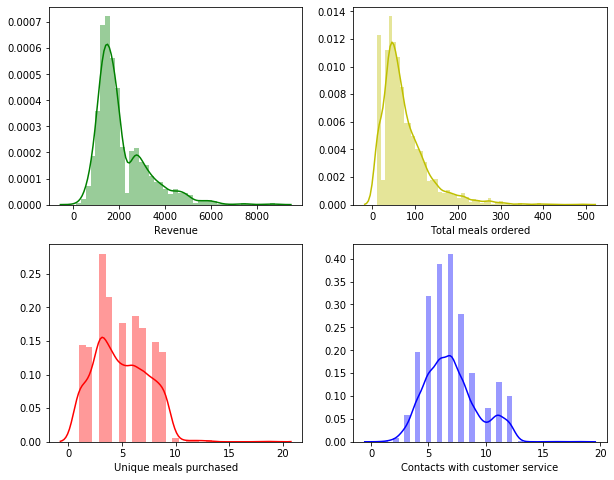

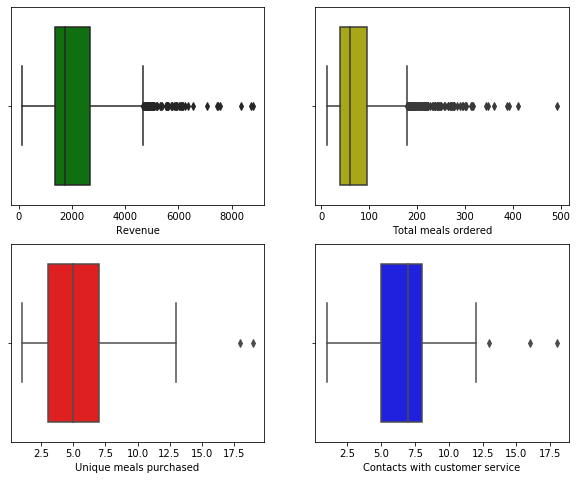

In [4]:
df.info() # Variable types

df.describe() # Summary statistics

df.isnull().sum() # Missing value counts

# ---- Histograms for variables with outliers

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(df.loc[:,'REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

plt.subplot(2, 2, 2)
sns.distplot(df.loc[:,'TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total meals ordered')

plt.subplot(2, 2, 3)
sns.distplot(df.loc[:,'UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Unique meals purchased')

plt.subplot(2, 2, 4)
sns.distplot(df.loc[:,'CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('Contacts with customer service')

# ---- Boxplots for variables with outliers

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(df.loc[:,'REVENUE'],
             color = 'g')
plt.xlabel('Revenue')

plt.subplot(2, 2, 2)
sns.boxplot(df.loc[:,'TOTAL_MEALS_ORDERED'],
             color = 'y')
plt.xlabel('Total meals ordered')

plt.subplot(2, 2, 3)
sns.boxplot(df.loc[:,'UNIQUE_MEALS_PURCH'],
             color = 'r')
plt.xlabel('Unique meals purchased')

plt.subplot(2, 2, 4)
sns.boxplot(df.loc[:,'CONTACTS_W_CUSTOMER_SERVICE'],
             color = 'b')
plt.xlabel('Contacts with customer service')

3. Bivariate feature exploration

Scatterplots were created for every numeric variable against REVENUE.
Pearson correlations were calculated for all numeric variables
The following cell outputs the scatterplots for the variables with the
highest correlation, as well as the correlation score of all variables
vs REVENUE.

The variables AVG_PREP_VID_TIME, MEDIAN_MEAL_RATING, and TOTAL_MEALS_ORDERED
have a positive correlation. The variable AVG_CLICKS_PER_VISIT has a negative
one. This may suggest that our highest revenue customers are those who engage
with us the most i.e. the ones who order several meals and spend longer times 
watching prep videos. They also have high satisfaction scores.

The negative correlation with AVG_CLICKS_PER_VISIT may suggest that our lower
revenue customers are having a more difficult experience on our platform which 
may lead to dissatisfaction and lower engagement. It is recommended that their
experience with our interfaces is studied.

REVENUE                         1.00
AVG_PREP_VID_TIME               0.64
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
TOTAL_PHOTOS_VIEWED             0.47
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
AVG_TIME_PER_SITE_VISIT         0.14
CONTACTS_W_CUSTOMER_SERVICE     0.10
MOBILE_NUMBER                   0.03
PRODUCT_CATEGORIES_VIEWED       0.03
MOBILE_LOGINS                   0.02
WEEKLY_PLAN                     0.01
TASTES_AND_PREFERENCES          0.01
CANCELLATIONS_BEFORE_NOON       0.01
REFRIGERATED_LOCKER            -0.00
EARLY_DELIVERIES               -0.00
CROSS_SELL_SUCCESS              0.00
PACKAGE_LOCKER                 -0.01
LATE_DELIVERIES                -0.01
PC_LOGINS                      -0.02
FOLLOWED_RECOMMENDATIONS_PCT   -0.02
CANCELLATIONS_AFTER_NOON       -0.04
UNIQUE_MEALS_PURCH             -0.06
AVG_CLICKS_PER_VISIT           -0.55
Name: REVENUE, dtype: float64


Text(0.5, 0, 'Average clicks per visit')

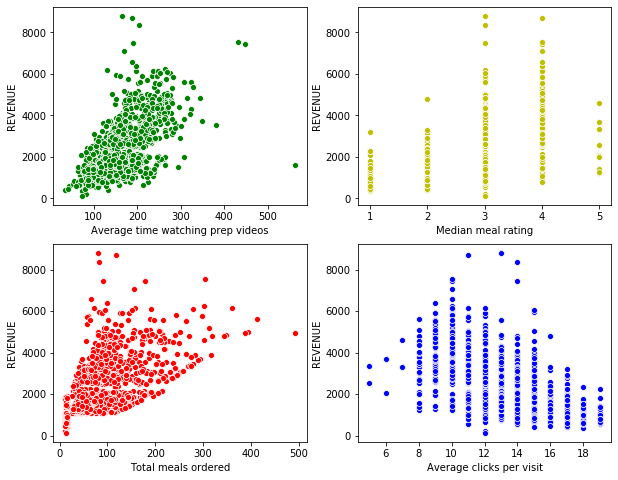

In [5]:
# Correlations are calculated and scores for REVENUE are presented

df_corr = df.corr().round(2)

print(df_corr.iloc[:, 0].sort_values(ascending = False))

# Scatterplots are shown for the variables with the highest correlation

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df.loc[:,'AVG_PREP_VID_TIME'],
                y = df.loc[:, 'REVENUE'],
             color = 'g')
plt.xlabel('Average time watching prep videos')

plt.subplot(2, 2, 2)
sns.scatterplot(x = df.loc[:,'MEDIAN_MEAL_RATING'],
                y = df.loc[:, 'REVENUE'],
             color = 'y')
plt.xlabel('Median meal rating')

plt.subplot(2, 2, 3)
sns.scatterplot(x = df.loc[:,'TOTAL_MEALS_ORDERED'],
                y = df.loc[:, 'REVENUE'],
             color = 'r')
plt.xlabel('Total meals ordered')

plt.subplot(2, 2, 4)
sns.scatterplot(x = df.loc[:,'AVG_CLICKS_PER_VISIT'],
                y = df.loc[:, 'REVENUE'],
             color = 'b')
plt.xlabel('Average clicks per visit')

4. Missing values, outlier, and trend change flagging

Thresholds were defined for the variables found to have outliers
through visual inspection of both histograms and boxplots.

The same method was used for trend change flagging by looking at the
scatterplots of each variable vs REVENUE.

Only the variable FAMILY_NAME was found to have missing values

For every step thresholds are defined, an empty column is created and
the replace method is used to generate the flags

In [6]:
# Outlier flags, threshold definition

total_meals_out = 300

unique_meals_out = 10

customer_care_out = 12

avg_time_out = 250

cancel_pre_noon_out = 7

late_deliv_out = 10

prep_time_out = 300

avg_clicks_out = 7 #Outliers on the left side

photos_clicked_out = 500

weekly_out = 30

early_out = 7


# Outlier flags, feature creation

df.loc[:,"out_total_meals"] = 0

condition = df.loc[:,"out_total_meals"][df.loc[:, "TOTAL_MEALS_ORDERED"] > total_meals_out]

df.loc[:,"out_total_meals"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_unique_meals"] = 0

condition = df.loc[:,"out_unique_meals"][df.loc[:, "UNIQUE_MEALS_PURCH"] > unique_meals_out]

df.loc[:,"out_unique_meals"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_customer_care"] = 0

condition = df.loc[:,"out_customer_care"][df.loc[:, "CONTACTS_W_CUSTOMER_SERVICE"] > customer_care_out]

df.loc[:,"out_customer_care"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_avg_time"] = 0

condition = df.loc[:,"out_avg_time"][df.loc[:, "AVG_TIME_PER_SITE_VISIT"] > avg_time_out]

df.loc[:,"out_avg_time"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_cancel_noon"] = 0

condition = df.loc[:,"out_cancel_noon"][df.loc[:, "CANCELLATIONS_BEFORE_NOON"] > cancel_pre_noon_out]

df.loc[:,"out_cancel_noon"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_late_deliv"] = 0

condition = df.loc[:,"out_late_deliv"][df.loc[:, "LATE_DELIVERIES"] > late_deliv_out]

df.loc[:,"out_late_deliv"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_prep_time"] = 0

condition = df.loc[:,"out_prep_time"][df.loc[:, "AVG_PREP_VID_TIME"] > prep_time_out]

df.loc[:,"out_prep_time"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_avg_clicks"] = 0

condition = df.loc[:,"out_avg_clicks"][df.loc[:, "AVG_CLICKS_PER_VISIT"] < avg_clicks_out]

df.loc[:,"out_avg_clicks"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_photos_clicked"] = 0

condition = df.loc[:,"out_photos_clicked"][df.loc[:, "TOTAL_PHOTOS_VIEWED"] > photos_clicked_out]

df.loc[:,"out_photos_clicked"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_weekly"] = 0

condition = df.loc[:,"out_weekly"][df.loc[:, "WEEKLY_PLAN"] > weekly_out]

df.loc[:,"out_weekly"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"out_early"] = 0

condition = df.loc[:,"out_early"][df.loc[:, "EARLY_DELIVERIES"] > early_out]

df.loc[:,"out_early"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)


# Trend flags, threshold definition

meals_ordered_mid = 20 # Data points below threshold show a different trend

meals_ordered_hi = 200 # Data becomes more disperse and shows a curved pattern

customer_care_hi = 10 #Revenue tends to be lower above this threshold

cancel_noon_hi = 4 # Values for revenue have a smaller range above this threshold

late_deliv_hi = 7 # Values for revenue have a smaller range above this threshold

largest_order_hi = 5 # Values for revenue have a downwards trend after this threshold

avg_clicks_hi = 12 # Values for revenue have a smaller range above this threshold


# Trend flags, feature creation

df.loc[:,"low_meals_ordered"] = 0

condition = df.loc[:,"low_meals_ordered"][df.loc[:, "TOTAL_MEALS_ORDERED"] < meals_ordered_mid]

df.loc[:,"low_meals_ordered"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_meals_ordered"] = 0

condition = df.loc[:,"hi_meals_ordered"][df.loc[:, "TOTAL_MEALS_ORDERED"] > meals_ordered_hi]

df.loc[:,"hi_meals_ordered"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_customer_care"] = 0

condition = df.loc[:,"hi_customer_care"][df.loc[:, "CONTACTS_W_CUSTOMER_SERVICE"] > customer_care_hi]

df.loc[:,"hi_customer_care"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_cancel_noon"] = 0

condition = df.loc[:,"hi_cancel_noon"][df.loc[:, "CANCELLATIONS_BEFORE_NOON"] > cancel_noon_hi]

df.loc[:,"hi_cancel_noon"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_late_deliv"] = 0

condition = df.loc[:,"hi_late_deliv"][df.loc[:, "LATE_DELIVERIES"] > late_deliv_hi]

df.loc[:,"hi_late_deliv"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_largest_order"] = 0

condition = df.loc[:,"hi_largest_order"][df.loc[:, "LARGEST_ORDER_SIZE"] > largest_order_hi]

df.loc[:,"hi_largest_order"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"hi_avg_clicks"] = 0

condition = df.loc[:,"hi_avg_clicks"][df.loc[:, "AVG_CLICKS_PER_VISIT"] > avg_clicks_hi]

df.loc[:,"hi_avg_clicks"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

# Missing value flags

df.loc[:,"miss_family_name"] = 0

condition = df.loc[:, "miss_family_name"][df.loc[:, "FAMILY_NAME"].isnull()]

df.loc[:,"miss_family_name"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

5. Creation of new features

Two types of new features were created

Email related features: according to the information provided by Marketing,
customers emails were classified as either "personal", "professional", or "junk".
Dummy variables were created for two of those groups to avoid collinearity. After
formatting, original email variables were dropped.

Weekly plan use features: following the rationale that customers who sign up for 
a weekly plan more frequently may represent different levels of revenue, a variable
was created dividing the total number of weekly plans by the total number of meals
purchased. The higher the value of this ratio, the less a customer signs up for weekly
plans. Since this variable would have similar values for customers regardless of their
total consumption (Customer A buys 30 meals through 10 weekly plans, customer B buys 
300 meals through a hundred weekly plans and they would both have the same ratio), 
additional flags were added to further segment the TOTAL_MEALS_ORDERED variable.

Finally, all NAME related variables were dropped since fictional names were considered
unlikely to have any relation with the rest of the dataset.

In [7]:
# A variable is created categorizing customer's emails as professional, personal or junk

# A new column is created with email domains

domain_vector = []

for email in df.loc[:, "EMAIL"]:
    
    domain_vector.append(email.split(sep = "@")[1])
    
df.loc[:, "email_domain"] = domain_vector

# Emails are classified according to the information provided by Marketing

professional = ["mmm.com", "amex.com", "apple.com", "boeing.com",
               "caterpillar.com", "chevron.com", "cisco.com",
               "cocacola.com", "disney.com", "dupont.com", "exxon.com",
               "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com",
               "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com",
               "merck.com", "microsoft.com", "nike.com", "pfizer.com",
               "pg.com", "travelers.com", "unitedtech.com", "unitedhealth.com",
               "verizon.com", "visa.com", "walmart.com"]

personal = ["gmail.com", "yahoo.com", "protonmail.com"]

junk = ["me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com"]

email_type_vector = []

for email in df.loc[:, "email_domain"]:
    
    if email in professional:
        
        email_type_vector.append("professional")
        
    elif email in personal:
        
        email_type_vector.append("personal")
        
    elif email in junk:
        
        email_type_vector.append("junk")
        
    else:
        
        email_type_vector.append("other")
    
df.loc[:, "email_type"] = email_type_vector

# Creating dummy variables based on email type

email_dummies = pd.get_dummies(df.loc[:, "email_type"])

df = df.join(email_dummies)

# Dropping email related variables after encoding

df = df.drop("EMAIL", axis = 1)

df = df.drop("email_domain", axis = 1)

df = df.drop("email_type", axis = 1)

# Dropping one of the dummy variables created to avoid colinearity

df = df.drop("junk", axis = 1)


# A new feature is created with the total meals purchased to weekly plans ratio

ratio_vector = []

for i in df.loc[:, "WEEKLY_PLAN"]:
    
    ratio_vector.append(df.loc[i, "WEEKLY_PLAN"] / df.loc[i, "TOTAL_MEALS_ORDERED"])
    
df.loc[:, "weekly_to_total_ratio"] = ratio_vector


# Additional flags are created for the total meals feature

df.loc[:,"total_meals_between_50_&_100"] = 0

condition = df.loc[:,"total_meals_between_50_&_100"][(df.loc[:, "TOTAL_MEALS_ORDERED"] >= 50) & (df.loc[:, "TOTAL_MEALS_ORDERED"] <= 100)]

df.loc[:,"total_meals_between_50_&_100"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"total_meals_between_101_&_150"] = 0

condition = df.loc[:,"total_meals_between_101_&_150"][(df.loc[:, "TOTAL_MEALS_ORDERED"] >= 101) & (df.loc[:, "TOTAL_MEALS_ORDERED"] <= 150)]

df.loc[:,"total_meals_between_101_&_150"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"total_meals_between_151_&_200"] = 0

condition = df.loc[:,"total_meals_between_151_&_200"][(df.loc[:, "TOTAL_MEALS_ORDERED"] >= 151) & (df.loc[:, "TOTAL_MEALS_ORDERED"] <= 200)]

df.loc[:,"total_meals_between_151_&_200"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"total_meals_between_201_&_250"] = 0

condition = df.loc[:,"total_meals_between_201_&_250"][(df.loc[:, "TOTAL_MEALS_ORDERED"] >= 201) & (df.loc[:, "TOTAL_MEALS_ORDERED"] <= 250)]

df.loc[:,"total_meals_between_201_&_250"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)

df.loc[:,"total_meals_between_251_&_300"] = 0

condition = df.loc[:,"total_meals_between_251_&_300"][(df.loc[:, "TOTAL_MEALS_ORDERED"] >= 251) & (df.loc[:, "TOTAL_MEALS_ORDERED"] <= 300)]

df.loc[:,"total_meals_between_251_&_300"].replace(to_replace = condition,
                                   value = 1,
                                   inplace = True)


# Name variables are dropped

df = df.drop("NAME", axis = 1)

df = df.drop("FIRST_NAME", axis = 1)

df = df.drop("FAMILY_NAME", axis = 1)

6. Preparation of train and test datasets

The following datasets were created using all available variables:

    df_data, including all variables except REVENUE without standardization
    data_scaled, normalizing the variables in df_data
    df_target, including the REVENUE variable alone
    df_target_log, performing a log transformation on the REVENUE variable
    
The decision to do a log transformation on the REVENUE variable was made
due to the pronounced right skewness of its distribution.
    

In [8]:
# Creation of different datasets for prediction

X_vars = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'out_total_meals', 'out_unique_meals', 'out_customer_care',
       'out_avg_time', 'out_cancel_noon', 'out_late_deliv', 'out_prep_time',
       'out_avg_clicks', 'out_photos_clicked', 'out_weekly', 'out_early',
       'low_meals_ordered', 'hi_meals_ordered', 'hi_customer_care',
       'hi_cancel_noon', 'hi_late_deliv', 'hi_largest_order', 'hi_avg_clicks',
       'miss_family_name', 'personal', 'professional', 'weekly_to_total_ratio',
       'total_meals_between_50_&_100', 'total_meals_between_101_&_150',
       'total_meals_between_151_&_200', 'total_meals_between_201_&_250',
       'total_meals_between_251_&_300']

# Unscaled dataset

df_data = df.loc[:, X_vars]

# Target variables

df_target = df.loc[:, 'REVENUE']

df_target_log = df_target.copy()

df_target_log = np.log(df_target_log)

# Creation of scaled dataset

scaler = StandardScaler()

data_scaled = df_data.copy()

scaler.fit(data_scaled)

data_scaled = scaler.transform(data_scaled)

data_scaled = pd.DataFrame(data_scaled)

data_scaled.columns = df_data.columns

7. Testing of different model options

Using cross validation grid search, several models were tested using different
values for their hyperparameters. A testing data set was held out every time
using 25% of the data with the seed = 222. The following models were tested

    Isotonic regression
    Kernel Ridge Regression
    OLS
    Ridge
    SGD
    ElasticNet
    Lars
    Lasso
    LassoLars
    LassoLarsIC
    ARDRegression
    Bayesian Ridge
    HuberRegressor
    KNN Regression
    MLPRegressor
    DTRegressor
    ADABoost
    Gradient Boosting
    Random Forest
    
To keep this document light, the cross validation grid search structure will be shown for only
one of the models in the following cell.

Performance scores for the training set were between 0.4 and 0.65 for most models.
Performance in the test set was even lower between 0.4 and 0.59. There were 2 exceptions
Gradient Boosting and Random Forest. 

All models seemed to overfit the data, having much higher scores from the trainin
dataset.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_data,
                                                   df_target,
                                                   test_size = 0.25,
                                                   random_state = 222)

# Setting hyperparameter grid

alpha_param = np.logspace(-5, 100, 100) 

param_grid = {'alpha' : alpha_param}

#Instantiating and training model

ridge_reg = Ridge()

ridge_reg_cv = GridSearchCV(ridge_reg, param_grid, cv=5)

ridge_reg_cv.fit(X_train, y_train)

# Printing scores

print(ridge_reg_cv.best_params_)

print(ridge_reg_cv.best_score_)

ridge_reg_cv.predict(X_test)

print(ridge_reg_cv.score(X_train, y_train).round(4))

print(ridge_reg_cv.score(X_test, y_test).round(4))

{'alpha': 23.10129700083158}
0.6460362265990911
0.6818
0.5919


8. Final model choice

The model which showed the best performance was a Gradient Boosting Regressor, 
predicting on the log of Revenue variable.

All variables were used at first obtaining performance scores of 0.908 and 0.813
for the training and test datasets respectively. The importance of all features
was calculated and a second model was created using only the features which were found
to be important. Its scores were slightly higher at 0.913 and 0.816

The following cell fits the data using the final variable selection, fits the model
and outputs performance scores and a plot of feature importance.

Training Score: 0.913
Testing Score: 0.816


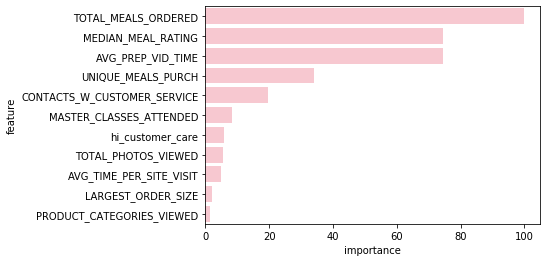

In [10]:
# Creation of dataset with significant features

X_vars_sig = ['TOTAL_MEALS_ORDERED', 'MEDIAN_MEAL_RATING', 'AVG_PREP_VID_TIME',
             'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'MASTER_CLASSES_ATTENDED',
             'TOTAL_PHOTOS_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'hi_customer_care',
             'PRODUCT_CATEGORIES_VIEWED', 'LARGEST_ORDER_SIZE']


data_sig = df.loc[:, X_vars_sig]

# Model instantiation and fitting

X_train, X_test, y_train, y_test = train_test_split(data_sig,
                                                   df_target_log,
                                                   test_size = 0.25,
                                                   random_state = 222)


gb_sig = GradientBoostingRegressor(max_depth = 3, n_estimators = 150, random_state = 222,
                              loss = 'huber')

gb_sig.fit(X_train, y_train)

gb_sig.predict(X_test)

# Scores are presented

print('Training Score:', gb_sig.score(X_train, y_train).round(3))

print('Testing Score:',  gb_sig.score(X_test, y_test).round(3))

# Feature importance is plotted

feature_importance = gb_sig.feature_importances_

#A transformation is performed to compare all features against the most important one

feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance = pd.DataFrame(feature_importance)

column_names = pd.DataFrame(data_sig.columns)

importance_ranking = pd.concat([column_names, feature_importance], axis = 1)

importance_ranking.columns = ['feature', 'importance']

importance_ranking = importance_ranking.sort_values(by = ['importance'],
                                                   ascending = False)

importance_ranking = importance_ranking[importance_ranking.loc[:, 'importance'] > 1]

sns.barplot(x = importance_ranking.loc[:, 'importance'], 
            y = importance_ranking.loc[:, 'feature'],
           color = 'pink')

plt.show()


Text(0.5, 0, 'Contacts with customer service')

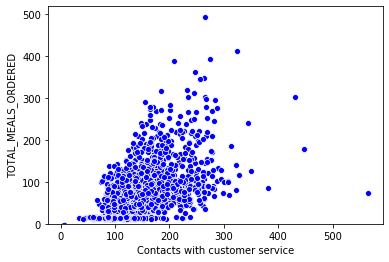

In [11]:
sns.scatterplot(x = df.loc[:,'AVG_PREP_VID_TIME'],
                y = df.loc[:, 'TOTAL_MEALS_ORDERED'],
             color = 'b')
plt.xlabel('Average clicks per visit')

sns.distplot(np.log(df.loc[:,'REVENUE']),
             bins  = 'fd',
             color = 'b')
plt.xlabel('Contacts with customer service')